In [63]:
import pandas as pd
import numpy as np

real_data = pd.read_csv('./data/realtor-data.csv', header=0)

# Profiling
print(real_data.columns.unique()) # Column names
real_data.info()

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [4]:
# Profiling
real_data.groupby(by='status').status.count()

status
for_sale          921528
ready_to_build      1631
Name: status, dtype: int64

In [20]:
# Profiling price column
print(real_data['price'].mean())
print(real_data['price'].min())
print(real_data['price'].max())
print(real_data['price'].describe())

884122.5224756469
0.0
875000000.0
count    9.230880e+05
mean     8.841225e+05
std      2.623745e+06
min      0.000000e+00
25%      2.690000e+05
50%      4.750000e+05
75%      8.399000e+05
max      8.750000e+08
Name: price, dtype: float64


In [21]:
# Profiling house_size column
print(real_data['house_size'].mean())
print(real_data['house_size'].min())
print(real_data['house_size'].max())
print(real_data['house_size'].describe())

2141.644071157623
100.0
1450112.0
count    6.253160e+05
mean     2.141644e+03
std      3.035327e+03
min      1.000000e+02
25%      1.130000e+03
50%      1.651000e+03
75%      2.499000e+03
max      1.450112e+06
Name: house_size, dtype: float64


In [24]:
# Profiling house_size column
print(real_data['house_size'].mean())
print(real_data['house_size'].min())
print(real_data['house_size'].max())
print(real_data['house_size'].describe())

2141.644071157623
100.0
1450112.0
count    6.253160e+05
mean     2.141644e+03
std      3.035327e+03
min      1.000000e+02
25%      1.130000e+03
50%      1.651000e+03
75%      2.499000e+03
max      1.450112e+06
Name: house_size, dtype: float64


In [32]:
print(real_data.groupby(by='state').price.mean())

state
Connecticut       4.839807e+05
Delaware          3.452066e+05
Georgia           4.927036e+05
Maine             4.200100e+05
Massachusetts     9.757505e+05
New Hampshire     4.807679e+05
New Jersey        6.046546e+05
New York          1.711473e+06
Pennsylvania      4.245694e+05
Puerto Rico       4.371370e+05
Rhode Island      5.002155e+05
South Carolina    1.895000e+04
Tennessee         3.490000e+04
Vermont           4.572101e+05
Virgin Islands    7.951458e+05
Virginia          3.620645e+05
West Virginia     6.250000e+04
Wyoming           5.350000e+05
Name: price, dtype: float64


In [64]:
print(real_data.duplicated()) # Check for duplicates
print(real_data.shape) # Check for number of rows
real_data.drop_duplicates(inplace=True) # remove duplicate rows
print(real_data.shape) # Check for number of rows without duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
923154     True
923155     True
923156     True
923157     True
923158     True
Length: 923159, dtype: bool
(923159, 12)
(113789, 12)


In [60]:
print(real_data.groupby(by='state').price.mean()) #average price by state
print(real_data[real_data.state == "New York"].shape) # Checking for the number of NY address

state
Connecticut       6.676918e+05
Delaware          3.724207e+05
Georgia           4.347530e+05
Maine             3.340368e+05
Massachusetts     9.749812e+05
New Hampshire     4.831362e+05
New Jersey        6.237974e+05
New York          1.760790e+06
Pennsylvania      4.493996e+05
Puerto Rico       6.745677e+05
Rhode Island      5.721080e+05
South Carolina    1.895000e+04
Tennessee         3.490000e+04
Vermont           4.446157e+05
Virgin Islands    8.170727e+05
Virginia          5.555714e+05
West Virginia     6.250000e+04
Wyoming           5.350000e+05
Name: price, dtype: float64
(28634, 12)


state
Connecticut       12042
Delaware           1197
Georgia               4
Maine              2526
Massachusetts      8544
New Hampshire      2314
New Jersey        16232
New York          19219
Pennsylvania       8337
Puerto Rico        2096
Rhode Island       3096
Vermont            1581
Virgin Islands      151
West Virginia         1
Wyoming               1
Name: state, dtype: int64
['Connecticut', 'Delaware', 'Georgia', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'Vermont', 'Virgin Islands', 'West Virginia', 'Wyoming']
[12042, 1197, 4, 2526, 8544, 2314, 16232, 19219, 8337, 2096, 3096, 1581, 151, 1, 1]


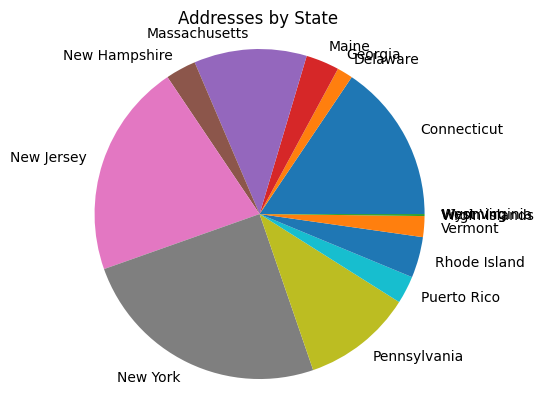

In [69]:
print(real_data.groupby(by='state').state.count()) # checking for the number of rows for each state

import matplotlib.pyplot as plt

labels = list(real_data['state'].sort_values().unique())
print(labels)

num_address_by_state = list(real_data.groupby(by='state')['state'].count())
print(num_address_by_state)

# 'subplot' returns two values: a figure and subplots
fig1, ax1 = plt.subplots()

# we use the 2nd value from 'subplot' to make a pie chart:
ax1.pie(num_address_by_state, labels=labels)

# this just ensures that pie is drawn as a circle:
ax1.axis('equal')  

# give the chart a title
plt.title("Addresses by State")

# style it:
plt.style.use('dark_background')

# show the chart:
plt.show()

In [68]:
# Add columns to data set that converts price per square ft and square meters

def price_per_sqft_convert(row):
    price_per_sqft = row.price / row.house_size
    return price_per_sqft

def sqft_to_meters_convert(row):
    sq_ft = row.house_size
    sq_meters = sq_ft * 0.092903
    
    price_per_sq_meters = row.price / sq_meters
    return price_per_sq_meters

real_data['price_per_sq_ft'] = real_data.apply(price_per_sqft_convert, axis=1)
real_data['price_per_sq_meter'] = real_data.apply(sqft_to_meters_convert, axis=1)

print(real_data[['price', 'house_size', 'price_per_sq_ft', 'price_per_sq_meter']].shape)

# Remove the NaN by converting string 'NaN' to NaN: 
def Nan_check(value):
    if value == 'NaN':
        value = np.nan
        return value
    else:
        return value

real_data.house_size = real_data.house_size.map(Nan_check)
real_data.price_per_sq_ft = real_data.price_per_sq_ft.map(Nan_check)
real_data.price_per_sq_meter = real_data.price_per_sq_meter.map(Nan_check)

real_data.dropna(subset=['house_size'], inplace=True) # drop NaN for house size

print(real_data[['price', 'house_size', 'price_per_sq_ft', 'price_per_sq_meter']].shape) # check to see number of rows removed from dropna()
print(real_data[['price', 'house_size', 'price_per_sq_ft', 'price_per_sq_meter']])

(113789, 4)
(77341, 4)
            price  house_size  price_per_sq_ft  price_per_sq_meter
0        105000.0       920.0       114.130435         1228.490305
1         80000.0      1527.0        52.390308          563.924823
2         67000.0       748.0        89.572193          964.147471
3        145000.0      1800.0        80.555556          867.093157
5        179000.0      2520.0        71.031746          764.579680
...           ...         ...              ...                 ...
923135  1649000.0      2178.0       757.116621         8149.538990
923136   779000.0      1816.0       428.964758         4617.340212
923144  1595000.0      2231.0       714.926042         7695.403185
923146  4595000.0      4863.0       944.889986        10170.715538
923147  2995000.0      3446.0       869.123622         9355.172832

[77341 rows x 4 columns]


In [81]:
# Drop the 'for_sale' and 'sold_date' columns

real_data.drop(['status', 'sold_date'], axis=1, inplace=True)

print(real_data.columns.unique())

Index(['price', 'bed', 'bath', 'acre_lot', 'full_address', 'street', 'city',
       'state', 'zip_code', 'house_size', 'price_per_sq_ft',
       'price_per_sq_meter'],
      dtype='object')
